## Doc2vec

In [6]:
import pandas as pd
import numpy as np
import gensim
import utils
import warnings
%matplotlib inline
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
import seaborn as sns
import xgboost as xgb
import multiprocessing
from sklearn import preprocessing
from gensim.models import Doc2Vec
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from collections import defaultdict  # For word frequency
from sklearn.model_selection import train_test_split
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from utils import hyperparameterTuning_RandomForest
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_MLP
from utils import plot_feature_importance
from utils import featureScore
from utils import folderPath
from utils import metrics
from utils import removeColumnContainString
from utils import Feature_Extraction
from utils import Normalizing


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path='/content/drive/MyDrive/NLP/'
df=pd.read_csv(path + '3.csv')

### caption

In [7]:
tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing 
sentences = [TaggedDocument(token, 'tag') for token in tokenized_caption]
d2v_model_caption = Doc2Vec(min_count=20,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

d2v_model_caption.build_vocab(sentences)
d2v_model_caption.train(sentences, total_examples= len(df['caption']), epochs=20)
# d2v_model_caption.save(path + "Save Models\\200_Doc2vec_Caption.model")

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [8]:
def word_vector(tokens, size,model):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [9]:
doc2vec_Arrays = np.zeros((len(tokenized_caption), 100)) 
for i in range(len(tokenized_caption)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_caption[i], 100,d2v_model_caption)
d2v_df_caption = pd.DataFrame(doc2vec_Arrays)
d2v_df_caption.shape

(41741, 100)

### hashtags

In [13]:
tokenized_hashtag = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing 

sentences = [TaggedDocument(token, 'tag') for token in tokenized_hashtag]

d2v_model_hastag = Doc2Vec(min_count=20,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

d2v_model_hastag.build_vocab(sentences)
d2v_model_hastag.train(sentences, total_examples= len(df['hashtags']), epochs=20)
d2v_model_hastag.save(path + "Save Models\\200_Doc2vec_Hashtag.model")

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [14]:
doc2vec_Arrays = np.zeros((len(tokenized_hashtag), 100)) 
for i in range(len(tokenized_hashtag)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_hashtag[i], 100,d2v_model_hastag)
d2v_df_hashtag = pd.DataFrame(doc2vec_Arrays)
d2v_df_hashtag.shape

(41741, 100)

### emojiText

In [15]:
tokenized_emojiText = df['emoji_text'].apply(lambda x: str(x).split()) # tokenizing 

sentences = [TaggedDocument(token, 'tag') for token in tokenized_emojiText]

d2v_model_emojiText = Doc2Vec(min_count=20,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

d2v_model_emojiText.build_vocab(sentences)
d2v_model_emojiText.train(sentences, total_examples= len(df['emoji_text']), epochs=20)
# d2v_model_emojiText.save(path + "Save Models\\200_Doc2vec_Hashtag.model")

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [16]:
doc2vec_Arrays = np.zeros((len(tokenized_emojiText), 100)) 
for i in range(len(tokenized_emojiText)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_emojiText[i], 100,d2v_model_emojiText)
d2v_df_emojiText = pd.DataFrame(doc2vec_Arrays)
d2v_df_emojiText.shape

(41741, 100)

### mentions

In [17]:
tokenized_mentions = df['mentions'].apply(lambda x: str(x).split()) # tokenizing 

sentences = [TaggedDocument(token, 'tag') for token in tokenized_mentions]

d2v_model_mentions = Doc2Vec(min_count=20,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

d2v_model_mentions.build_vocab(sentences)
d2v_model_mentions.train(sentences, total_examples= len(df['mentions']), epochs=20)
# d2v_model_mentions.save(path + "Save Models\\200_Doc2vec_Mentions.model")

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [18]:
doc2vec_Arrays = np.zeros((len(tokenized_mentions), 100)) 
for i in range(len(tokenized_mentions)):
    doc2vec_Arrays[i,:] = word_vector(tokenized_mentions[i], 100,d2v_model_mentions)
d2v_df_mentions = pd.DataFrame(doc2vec_Arrays)
d2v_df_mentions.shape

(41741, 100)

In [20]:
d2v_Df = pd.DataFrame(np.hstack((d2v_df_caption,d2v_df_hashtag,d2v_df_emojiText,d2v_df_mentions, df)))

In [21]:
d2v_Df

,0,1,2,3,4,5,6,7,8,9,...,418,419,420,421,422,423,424,425,426,427
0,0.006542,0.446043,0.190834,-0.58967,-0.006561,0.583231,0.336517,-0.650101,0.480985,-0.295225,...,0.282576,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,NaN,0,"['⏱', '📄', '🧑🏻\u200d⚕️', '👨\u200d👩\u200d👧\u200...","'stopwatch', 'page facing up', 'health worker:...",10,860,3219.75
1,0.130594,0.201045,-0.197581,-0.169698,0.219408,0.866994,0.345108,-0.621988,0.793681,-0.623615,...,0.168056,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,NaN,0,"['👏', '🧡']","'clapping hands', 'orange heart'",2,716,5178.333333
2,0.426987,0.285061,-0.107581,0.440207,0.370446,-0.265395,-0.842496,0.294362,0.436147,0.783965,...,0.0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,NaN,0,[],NaN,0,425,17663.68
3,0.341896,0.50503,-0.240991,0.048525,0.281716,0.13058,-0.998823,0.355265,0.744704,0.483714,...,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,NaN,0,[],NaN,0,490,16841.857143
4,0.829186,0.733403,-0.041127,-0.582882,-0.173909,0.286213,-0.224199,0.049668,0.731677,-0.059772,...,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],NaN,0,530,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.120316,0.292351,-0.233809,-0.012605,0.173857,0.60093,0.133491,-0.288896,0.748262,-0.331931,...,0.42803,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],NaN,0,878,153640.333333
41737,0.229549,0.442438,-0.157374,0.027173,-0.199473,0.548642,0.178301,-0.295527,0.739238,-0.017587,...,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],'bottle with popping cork',1,532,81714.428571
41738,0.286952,0.358389,-0.219361,0.259514,0.002109,0.600696,-0.085044,-0.318257,0.657195,-0.099622,...,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],NaN,0,479,102699.125
41739,0.285633,0.195498,-0.135645,0.014039,0.090466,0.415973,0.102287,-0.196327,0.716322,-0.186443,...,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,NaN,0,[],NaN,0,643,70165.571429


In [22]:
print(len(d2v_Df.columns))
a=len(d2v_Df.columns)-25+1
print(a)
d2v_Df[len(d2v_Df.columns)-28+1]
d2v_Df.rename(columns = {a:'likes'}, inplace = True)
df=utils.removeColumnContainString(d2v_Df)

428
404
Couldn't covert 402 to float
Couldn't covert 419 to float
Couldn't covert 421 to float
Couldn't covert 423 to float
Couldn't covert 424 to float


In [23]:
df = pd.DataFrame(df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [24]:
dropped = [106,108,109,111,112,113]
normalized_df = normalized_df.drop(dropped,axis=1)
normalized_df

,0,1,2,3,4,5,6,7,8,9,...,414,415,416,417,418,420,422,425,426,427
0,0.421128,0.429562,0.624629,0.420200,0.465294,0.503983,0.501800,0.293831,0.326565,0.449800,...,0.0,0.0,0.0,0.632390,0.641288,0.166667,0.000000,0.192308,0.390632,0.005571
1,0.461350,0.351589,0.484203,0.530261,0.521940,0.572349,0.503965,0.301281,0.435019,0.360878,...,0.0,0.0,0.0,0.405556,0.584028,0.187500,0.000000,0.038462,0.325148,0.008959
2,0.557450,0.378328,0.516741,0.690098,0.559802,0.299528,0.204617,0.544126,0.311014,0.742025,...,0.0,1.0,0.0,0.000000,0.500000,0.520833,0.000000,0.000000,0.192815,0.030561
3,0.529861,0.448335,0.468509,0.587450,0.537559,0.394928,0.165213,0.560266,0.418032,0.660722,...,0.0,0.0,0.0,0.333333,0.625000,0.583333,0.000000,0.000000,0.222374,0.029139
4,0.687857,0.521018,0.540767,0.421979,0.423344,0.432424,0.360465,0.479279,0.413514,0.513556,...,0.0,0.0,0.0,0.333333,0.583333,0.583333,0.057143,0.000000,0.240564,0.029139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.458017,0.380648,0.471106,0.571430,0.510521,0.508247,0.450625,0.389555,0.419266,0.439861,...,1.0,0.0,0.0,0.506629,0.714015,0.125000,0.114286,0.000000,0.398818,0.265825
41737,0.493434,0.428415,0.498739,0.581855,0.416935,0.495650,0.461920,0.387797,0.416137,0.524979,...,0.0,0.0,0.0,0.416667,0.745833,0.145833,0.028571,0.019231,0.241473,0.141381
41738,0.512046,0.401666,0.476329,0.642744,0.467468,0.508191,0.395541,0.381774,0.387681,0.502766,...,0.0,0.0,0.0,0.510417,0.630208,0.166667,0.028571,0.000000,0.217372,0.177688
41739,0.511619,0.349824,0.506595,0.578413,0.489617,0.463687,0.442760,0.414087,0.408188,0.479256,...,0.0,0.0,0.0,0.708333,0.722917,0.145833,0.000000,0.000000,0.291951,0.121399


In [25]:
y=normalized_df['likes']                #Target Variable 
X = normalized_df.drop('likes', axis=1) #Feature Matrix 

In [26]:
x_train_d2v_df, x_test_d2v_df, y_train_d2v_df, y_test_d2v_df = train_test_split(X, y, test_size=0.2)

###XGBoost

In [27]:
# hyperparameterTuning_XGBoost(x_train_doc2vec,y_train_doc2vec)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_d2v_df, y_train_d2v_df)
y_pred = xg_reg.predict(x_test_d2v_df)

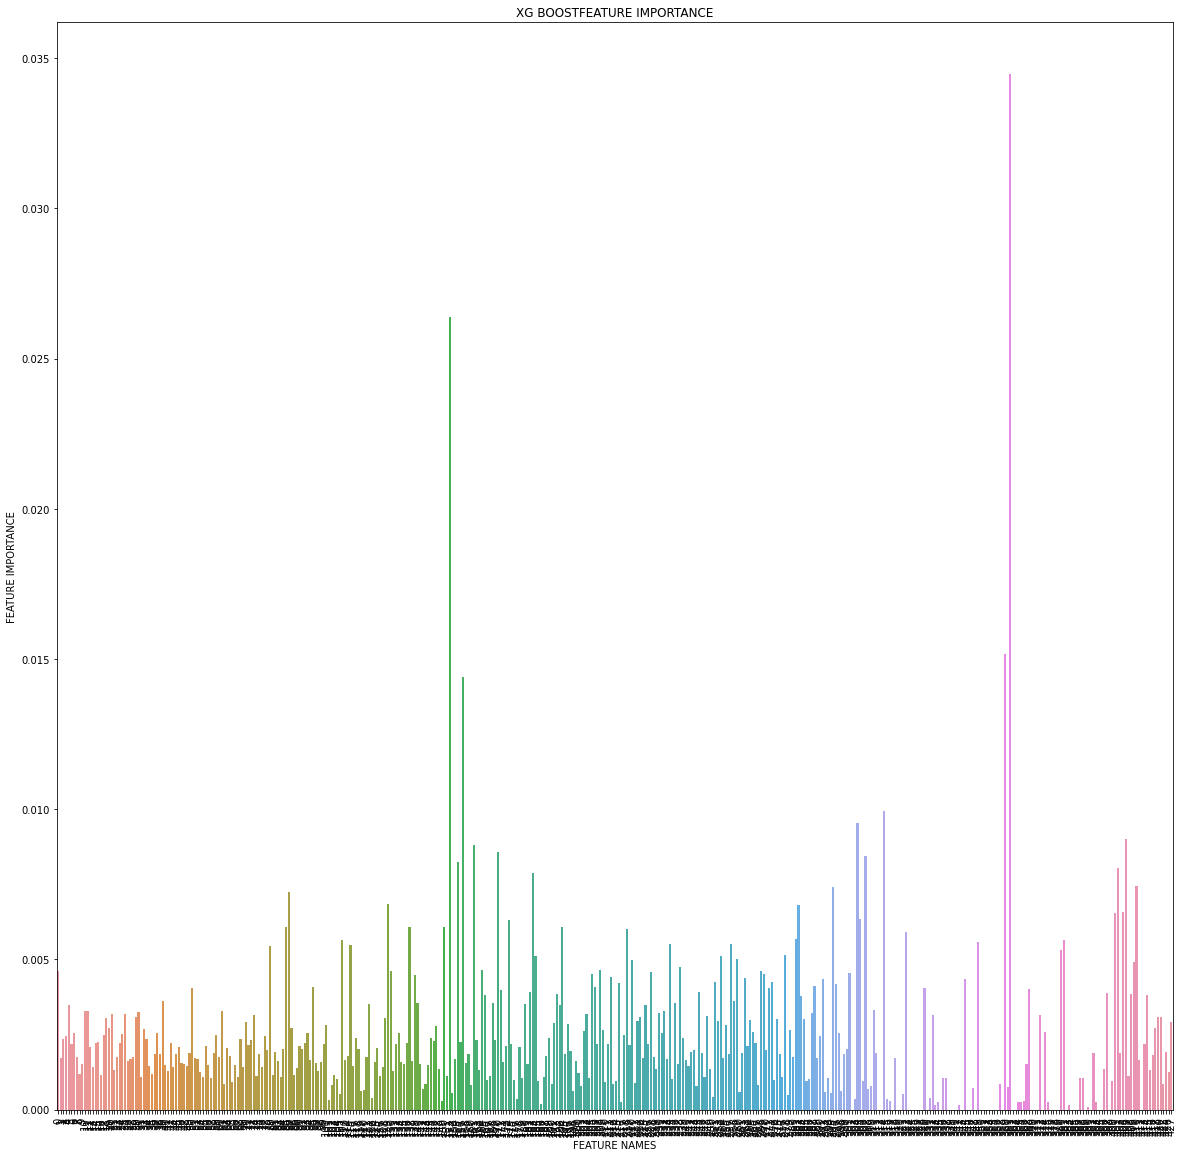

In [28]:
plot_feature_importance(xg_reg.feature_importances_,x_train_d2v_df.columns,'XG BOOST')

In [29]:
featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.00461
Feature: 1, Score: 0.00174
Feature: 2, Score: 0.00236
Feature: 3, Score: 0.00246
Feature: 4, Score: 0.00349
Feature: 5, Score: 0.00218
Feature: 6, Score: 0.00256
Feature: 7, Score: 0.00174
Feature: 8, Score: 0.00119
Feature: 9, Score: 0.00152
Feature: 10, Score: 0.00327
Feature: 11, Score: 0.00327
Feature: 12, Score: 0.00208
Feature: 13, Score: 0.00141
Feature: 14, Score: 0.00222
Feature: 15, Score: 0.00225
Feature: 16, Score: 0.00117
Feature: 17, Score: 0.00249
Feature: 18, Score: 0.00304
Feature: 19, Score: 0.00270
Feature: 20, Score: 0.00317
Feature: 21, Score: 0.00133
Feature: 22, Score: 0.00175
Feature: 23, Score: 0.00220
Feature: 24, Score: 0.00251
Feature: 25, Score: 0.00320
Feature: 26, Score: 0.00163
Feature: 27, Score: 0.00168
Feature: 28, Score: 0.00175
Feature: 29, Score: 0.00307
Feature: 30, Score: 0.00327
Feature: 31, Score: 0.00110
Feature: 32, Score: 0.00269
Feature: 33, Score: 0.00234
Feature: 34, Score: 0.00145
Feature: 35, Score: 0.00120
Fe

In [30]:
dict_info = {'Model': [], 'RMSE': [], 'R2': [],'MAE': [], 'RMSLE': [],'max_error_':[]}

rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_d2v_df,y_pred)

dict_info['Model'].append('XGboost')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### Random Forest

In [31]:
# utils.hyperparameterTuning_RandomForest(x_train_w2v_df,y_train_w2v_df)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_d2v_df, y_train_d2v_df)
y_pred_d2vec_rnd = rnd_clf.predict(x_test_d2v_df)

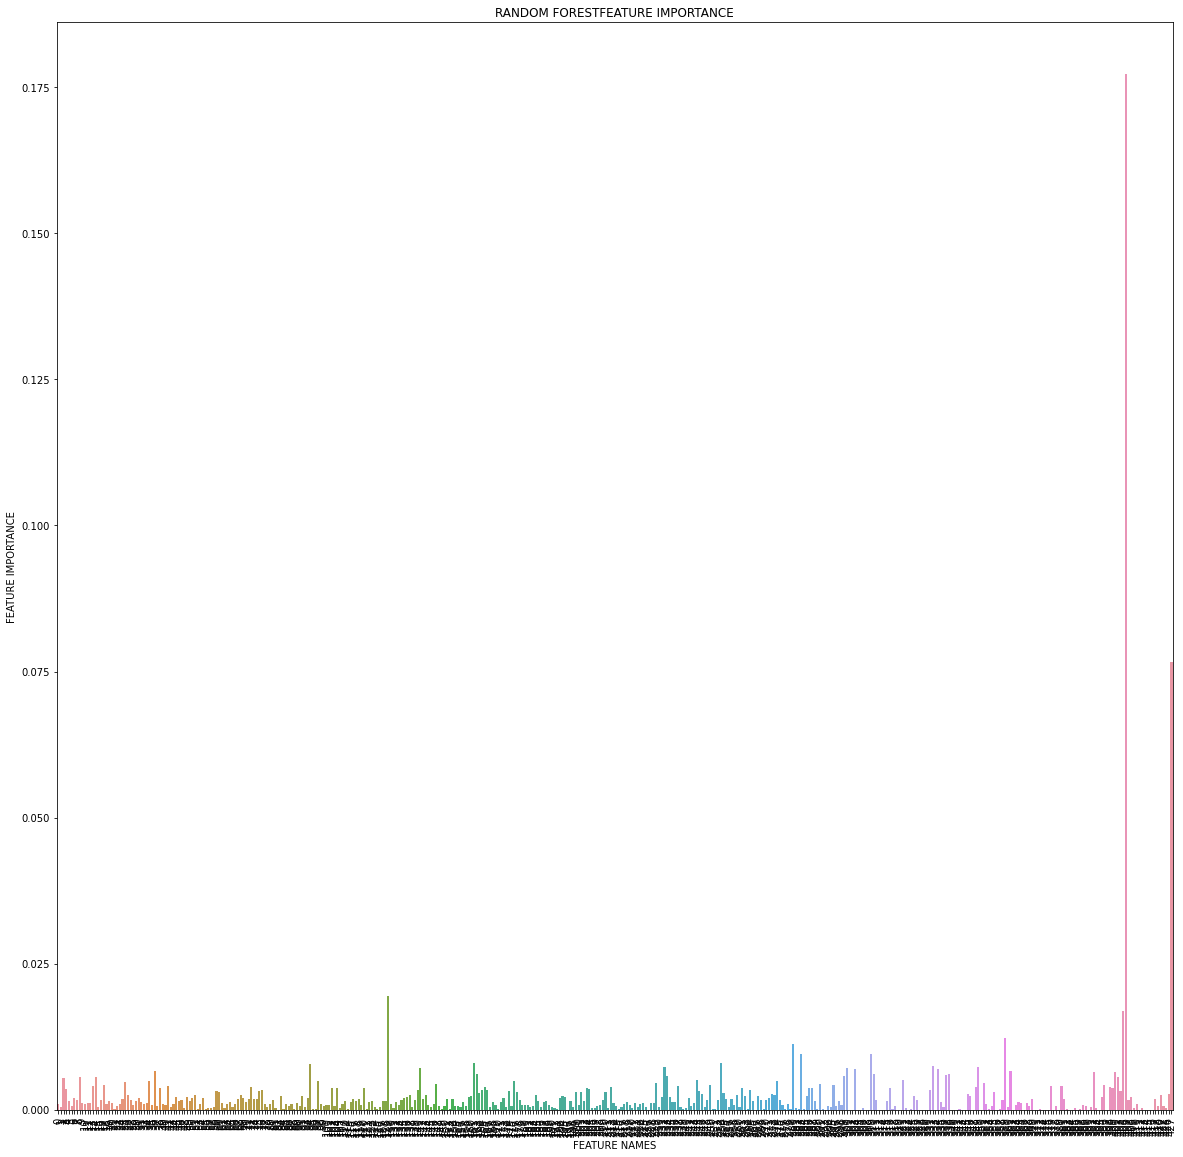

In [32]:
plot_feature_importance(rnd_clf.feature_importances_,x_train_d2v_df.columns,'RANDOM FOREST')

In [33]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_d2v_df,y_pred_d2vec_rnd)

dict_info['Model'].append('Random Forest')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### MLP

In [34]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam')
mlp_GS.fit(x_train_d2v_df, y_train_d2v_df)
y_pred_d2vec_mlp = mlp_GS.predict(x_test_d2v_df)

In [35]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_d2v_df,y_pred_d2vec_mlp)

dict_info['Model'].append('MLP')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### SVR

In [36]:
from sklearn.svm import LinearSVR
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0)
svr.fit(x_train_d2v_df, y_train_d2v_df)
y_pred_w2vec_SVR = svr.predict(x_test_d2v_df)

In [37]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_d2v_df,y_pred_d2vec_mlp)

dict_info['Model'].append('SVR')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [38]:
dfData = pd.DataFrame(dict_info)
dfData

,Model,RMSE,R2,MAE,RMSLE,max_error_
0,XGboost,0.032519,0.526393,0.009156,-3.425925,0.917433
1,Random Forest,0.038191,0.346763,0.012123,-3.265144,0.917303
2,MLP,0.038527,0.335237,0.012210,-3.256399,0.864839
3,SVR,0.038527,0.335237,0.012210,-3.256399,0.864839
